## Data Mining Homework \#1 Problem \#1 

## Haojun Zhu W\#08393310 

I have chosen the Reuters Corpora for this text analysis assignment. Reuters-21758 can be found [here](http://www.daviddlewis.com/resources/testcollections/reuters21578/). 

A GitHub repository with the XML version can be found [here](https://github.com/HaojunZhu/comp479.a1/tree/master/reuters). Each XML file contains 1000 news items. In this assignment, the 1000 news items in the first file was used. 

The codes were modified adapated from Prof. Mike Borowczak's lecture notes [here](https://gist.github.com/mborowczak/e6161810e4d0deaa1eb3d49c6a29bff0)

Since all the 1000 news items were XML-encoded, I first parsed them out and wrote them into separate text files. 

In [1]:
import os
import xml.etree.ElementTree as ET
tree = ET.parse('/home/haojun/Downloads/reuters21578/reut2-000.xml')
root = tree.getroot()   # root is at the <LEWIS> element level

# create a directory to store the documents extracted from XML
if not os.path.exists('/home/haojun/Downloads/reuters21578/documents/'):
    os.makedirs('/home/haojun/Downloads/reuters21578/documents/')

cnt = 1
for child in root:      # child is at the <REUTERS> element level
    body = child.find('TEXT').find('BODY')
    if body is not None:
        with open('/home/haojun/Downloads/reuters21578/documents/document%i.txt' %cnt, 'w') as output:
            output.write(body.text)
    else:
        with open('/home/haojun/Downloads/reuters21578/documents/document%i.txt' %cnt, 'w') as output:
            output.write('')        
    cnt += 1
    if cnt > 1000:
        break

Now, I have extracted the 1000 news items from the single XML file. I picked the first 500 text files as the documents of interest to compute TF.IDF. As a first step, I have disarded all the numbers and punctuations from these documents. By doing so, I have limited the number of terms to check. 

In [2]:
import string
corpus = []
D = {}
for i in range(0,500):
    with open('/home/haojun/Downloads/reuters21578/documents/document%i.txt' %(i+1), 'r') as doc:
        text = doc.read()
        text = text.lower()
        D[i] = ''.join([j for j in text if not j.isdigit()])
        D[i] = D[i].translate(None, string.punctuation)
    
for i in range(0,500):
    corpus.append(D[i][:])

Next, I extract the individual terms.

In [3]:
terms = []
for doc in corpus:
    terms = terms + doc.split()
terms = list(set(terms))
print terms[1:50] # first 50 terms

['yellow', 'four', 'circuitry', 'aggression', 'increase', 'eligible', 'electricity', 'farflung', 'hermann', 'sinking', 'regional', 'uncertain', 'bringing', 'juster', 'wednesday', 'intensification', 'commented', 'hostels', 'charter', 'infringed', 'miller', 'second', 'lukman', 'errors', 'relieving', 'rationallicensing', 'contributed', 'increasing', 'receivables', 'avery', 'splinter', 'malacarne', 'here', 'herd', 'reported', 'china', 'affiliated', 'borrowers', 'kids', 'elaborate', 'vicepresident', 'reports', 'sevenyear', 'lawsons', 'military', 'criticism', 'txn', 'projection', 'criticise']


In [4]:
# TF list
TF = []

#existance of term across documents : Document Frequency of all Term 
n = [0 for i in range(len(terms))]


for doc in corpus:
    
    tf_doc = [0 for i in range(len(terms))]
    
    #determining term frequency
    for term in doc.split():
        term_i = terms.index(term)
        tf_doc[term_i] = tf_doc[term_i] + 1
    
    # computing the document term frequency
    for item in range(len(terms)):
        if tf_doc[item] > 0:
            n[item] = n[item] + 1

    TF.append(tf_doc)

In [5]:
TFN = []
#for each document (TFj) in the Term Freq Matrix
for TFj in TF:
    #for each term TFij
    TFj = [TFij / float(max(TFj) + .000001) for TFij in TFj]
    TFN.append(TFj)

In [6]:
import math
N = 500
IDF = []
for termi in range(len(terms)):
    IDF.append(math.log(N/float(n[termi]),2))

In [7]:
TFNIDF = []
for TFNj in TFN:
    TFNjIDF = []
    for termIDX in range(len(terms)):
        TFNjIDF.append(TFNj[termIDX]*IDF[termIDX])
    TFNIDF.append(TFNjIDF)

In [8]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [9]:
TFIDX = pd.DataFrame(TFNIDF)
TFIDX.columns = terms
TFIDX

,ryoka,yellow,four,circuitry,aggression,increase,eligible,electricity,farflung,hermann,...,june,margaret,priced,psonl,incurred,upwards,alienated,indirectly,volumes,tonnes
0,0,0,0.000000,0,0,0.000000,0,0,0,0,...,0.000000,0,0.000000,0,0,0,0,0.000000,0,0.000000
1,0,0,0.000000,0,0,0.000000,0,0,0,0,...,0.000000,0,0.000000,0,0,0,0,0.000000,0,0.000000
2,0,0,0.000000,0,0,0.000000,0,0,0,0,...,0.000000,0,0.000000,0,0,0,0,0.000000,0,0.000000
3,0,0,0.000000,0,0,0.000000,0,0,0,0,...,0.000000,0,0.000000,0,0,0,0,0.000000,0,0.000000
4,0,0,0.000000,0,0,0.000000,0,0,0,0,...,0.000000,0,0.000000,0,0,0,0,0.000000,0,0.000000
5,0,0,0.000000,0,0,0.000000,0,0,0,0,...,0.000000,0,0.000000,0,0,0,0,0.000000,0,0.312223
6,0,0,0.000000,0,0,0.000000,0,0,0,0,...,0.000000,0,1.143366,0,0,0,0,0.000000,0,0.000000
7,0,0,0.000000,0,0,0.000000,0,0,0,0,...,0.000000,0,0.000000,0,0,0,0,0.000000,0,0.000000
8,0,0,0.000000,0,0,0.852799,0,0,0,0,...,0.000000,0,0.000000,0,0,0,0,0.000000,0,0.000000
9,0,0,0.000000,0,0,0.227413,0,0,0,0,...,0.000000,0,0.000000,0,0,0,0,0.000000,0,0.000000


In the following, I calculate the min,max, and average for each row and each column of the TF.IDF matrix. 

In [10]:
# column(term) average
c_avg = TFIDX.mean(axis=0,)
print c_avg

#list(c_avg)

ryoka                0.004483
yellow               0.004483
four                 0.052760
circuitry            0.001888
aggression           0.000690
increase             0.049436
eligible             0.007169
electricity          0.003298
farflung             0.000512
hermann              0.004483
sinking              0.010925
regional             0.003075
uncertain            0.002198
bringing             0.003869
juster               0.001494
wednesday            0.016126
intensification      0.002989
commented            0.000897
hostels              0.001494
charter              0.004483
infringed            0.008966
miller               0.007311
second               0.024891
lukman               0.000664
errors               0.000598
relieving            0.003586
rationallicensing    0.004552
contributed          0.005422
increasing           0.011115
receivables          0.003487
                       ...   
recede               0.000854
funaro               0.019368
record    

In [11]:
# column(term) min
c_min = TFIDX.min(axis=0)
print c_min

#list(c_min)

ryoka                0
yellow               0
four                 0
circuitry            0
aggression           0
increase             0
eligible             0
electricity          0
farflung             0
hermann              0
sinking              0
regional             0
uncertain            0
bringing             0
juster               0
wednesday            0
intensification      0
commented            0
hostels              0
charter              0
infringed            0
miller               0
second               0
lukman               0
errors               0
relieving            0
rationallicensing    0
contributed          0
increasing           0
receivables          0
                    ..
recede               0
funaro               0
record               0
below                0
ruling               0
cake                 0
broadly              0
fertilizers          0
resumption           0
raced                0
cmos                 0
overseachinese       0
matahina   

In [12]:
# column(term) max
c_max = TFIDX.max(axis=0)
print c_max

#list(c_max)

ryoka                2.241446
yellow               2.241446
four                 3.351073
circuitry            0.943767
aggression           0.344838
increase             1.705597
eligible             1.991446
electricity          1.054403
farflung             0.256165
hermann              2.241446
sinking              3.186313
regional             0.922603
uncertain            0.492055
bringing             1.137969
juster               0.747149
wednesday            2.821927
intensification      1.494297
commented            0.448289
hostels              0.747149
charter              2.241446
infringed            4.482891
miller               3.163209
second               2.160963
lukman               0.332066
errors               0.298859
relieving            1.793156
rationallicensing    1.137969
contributed          1.107309
increasing           1.491446
receivables          1.743347
                       ...   
recede               0.426942
funaro               3.321928
record    

In [13]:
# row(document) average
r_avg = TFIDX.mean(axis=1)
print r_avg

#list(r_avg)

0      0.010592
1      0.008875
2      0.004941
3      0.007467
4      0.013515
5      0.007628
6      0.007765
7      0.012168
8      0.005047
9      0.006403
10     0.002830
11     0.005427
12     0.004731
13     0.001401
14     0.005997
15     0.007467
16     0.007260
17     0.008292
18     0.003713
19     0.006824
20     0.012208
21     0.007722
22     0.005466
23     0.003105
24     0.008885
25     0.007020
26     0.003290
27     0.008547
28     0.005470
29     0.000000
         ...   
470    0.005497
471    0.010804
472    0.009090
473    0.005695
474    0.009298
475    0.005868
476    0.008967
477    0.007987
478    0.009243
479    0.005571
480    0.007087
481    0.015231
482    0.001586
483    0.003683
484    0.004737
485    0.010446
486    0.012511
487    0.014563
488    0.008368
489    0.005101
490    0.008631
491    0.004969
492    0.012416
493    0.002795
494    0.008631
495    0.007245
496    0.013238
497    0.006007
498    0.007859
499    0.007298
dtype: float64


In [14]:
# row(document) min
r_min = TFIDX.min(axis=1)
print r_min

#list(r_min)

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
470    0
471    0
472    0
473    0
474    0
475    0
476    0
477    0
478    0
479    0
480    0
481    0
482    0
483    0
484    0
485    0
486    0
487    0
488    0
489    0
490    0
491    0
492    0
493    0
494    0
495    0
496    0
497    0
498    0
499    0
dtype: float64


In [15]:
# row(document) max
r_max = TFIDX.max(axis=1)
print r_max

list(r_max)

0      2.078031
1      6.724337
2      2.463371
3      2.786314
4      7.965783
5      5.517405
6      4.482891
7      5.535615
8      2.358928
9      2.063372
10     2.452847
11     2.105448
12     3.407305
13     2.522928
14     4.482892
15     2.786314
16     4.785615
17     2.636008
18     1.740224
19     3.362169
20     3.252213
21     8.965780
22     2.561652
23     3.754990
24     5.310521
25     1.257755
26     2.943416
27     1.063470
28     1.408624
29     0.000000
         ...   
470    3.362169
471    4.482891
472    8.965783
473    5.603614
474    2.786313
475    3.586313
476    5.224337
477    2.655261
478    4.482891
479    2.529446
480    2.988594
481    5.535615
482    2.943416
483    2.943415
484    2.128193
485    5.310521
486    6.724337
487    7.965782
488    1.991446
489    2.943416
490    4.982891
491    2.988594
492    5.535615
493    2.943416
494    4.982891
495    3.642350
496    8.965781
497    3.794169
498    5.974337
499    3.842478
dtype: float64


[2.0780305926061708,
 6.7243365324124325,
 2.4633712523675433,
 2.7863136209877144,
 7.9657829570315934,
 5.5174052892224168,
 4.482891021608288,
 5.5356149540519608,
 2.3589277958773018,
 2.0633716074836865,
 2.4528466508869187,
 2.1054481807044914,
 3.4073054533645628,
 2.5229280438391073,
 4.4828915819695965,
 2.7863136209877144,
 4.7856151415519133,
 2.636007591692648,
 1.7402239646908029,
 3.3621686864771969,
 3.2522132115367612,
 8.9657798017721859,
 2.5616524697854199,
 3.7549895640937172,
 5.3105210862676957,
 1.257755347170048,
 2.9434159810643021,
 1.063470275167858,
 1.4086239185594369,
 0.0,
 0.0,
 3.6845918754900771,
 8.9657812960683216,
 1.7931564983011177,
 4.7178544122912953,
 3.982890150885968,
 2.9434160511456251,
 2.9434161037066202,
 4.7794696149033298,
 2.9885942634549849,
 3.9213896751299253,
 6.6438539751567331,
 2.1068479657046253,
 3.579469854903282,
 5.5174052892224168,
 2.4159474857410377,
 1.1433666440104164,
 2.6552605431338479,
 7.9657822932165132,
 2.7563

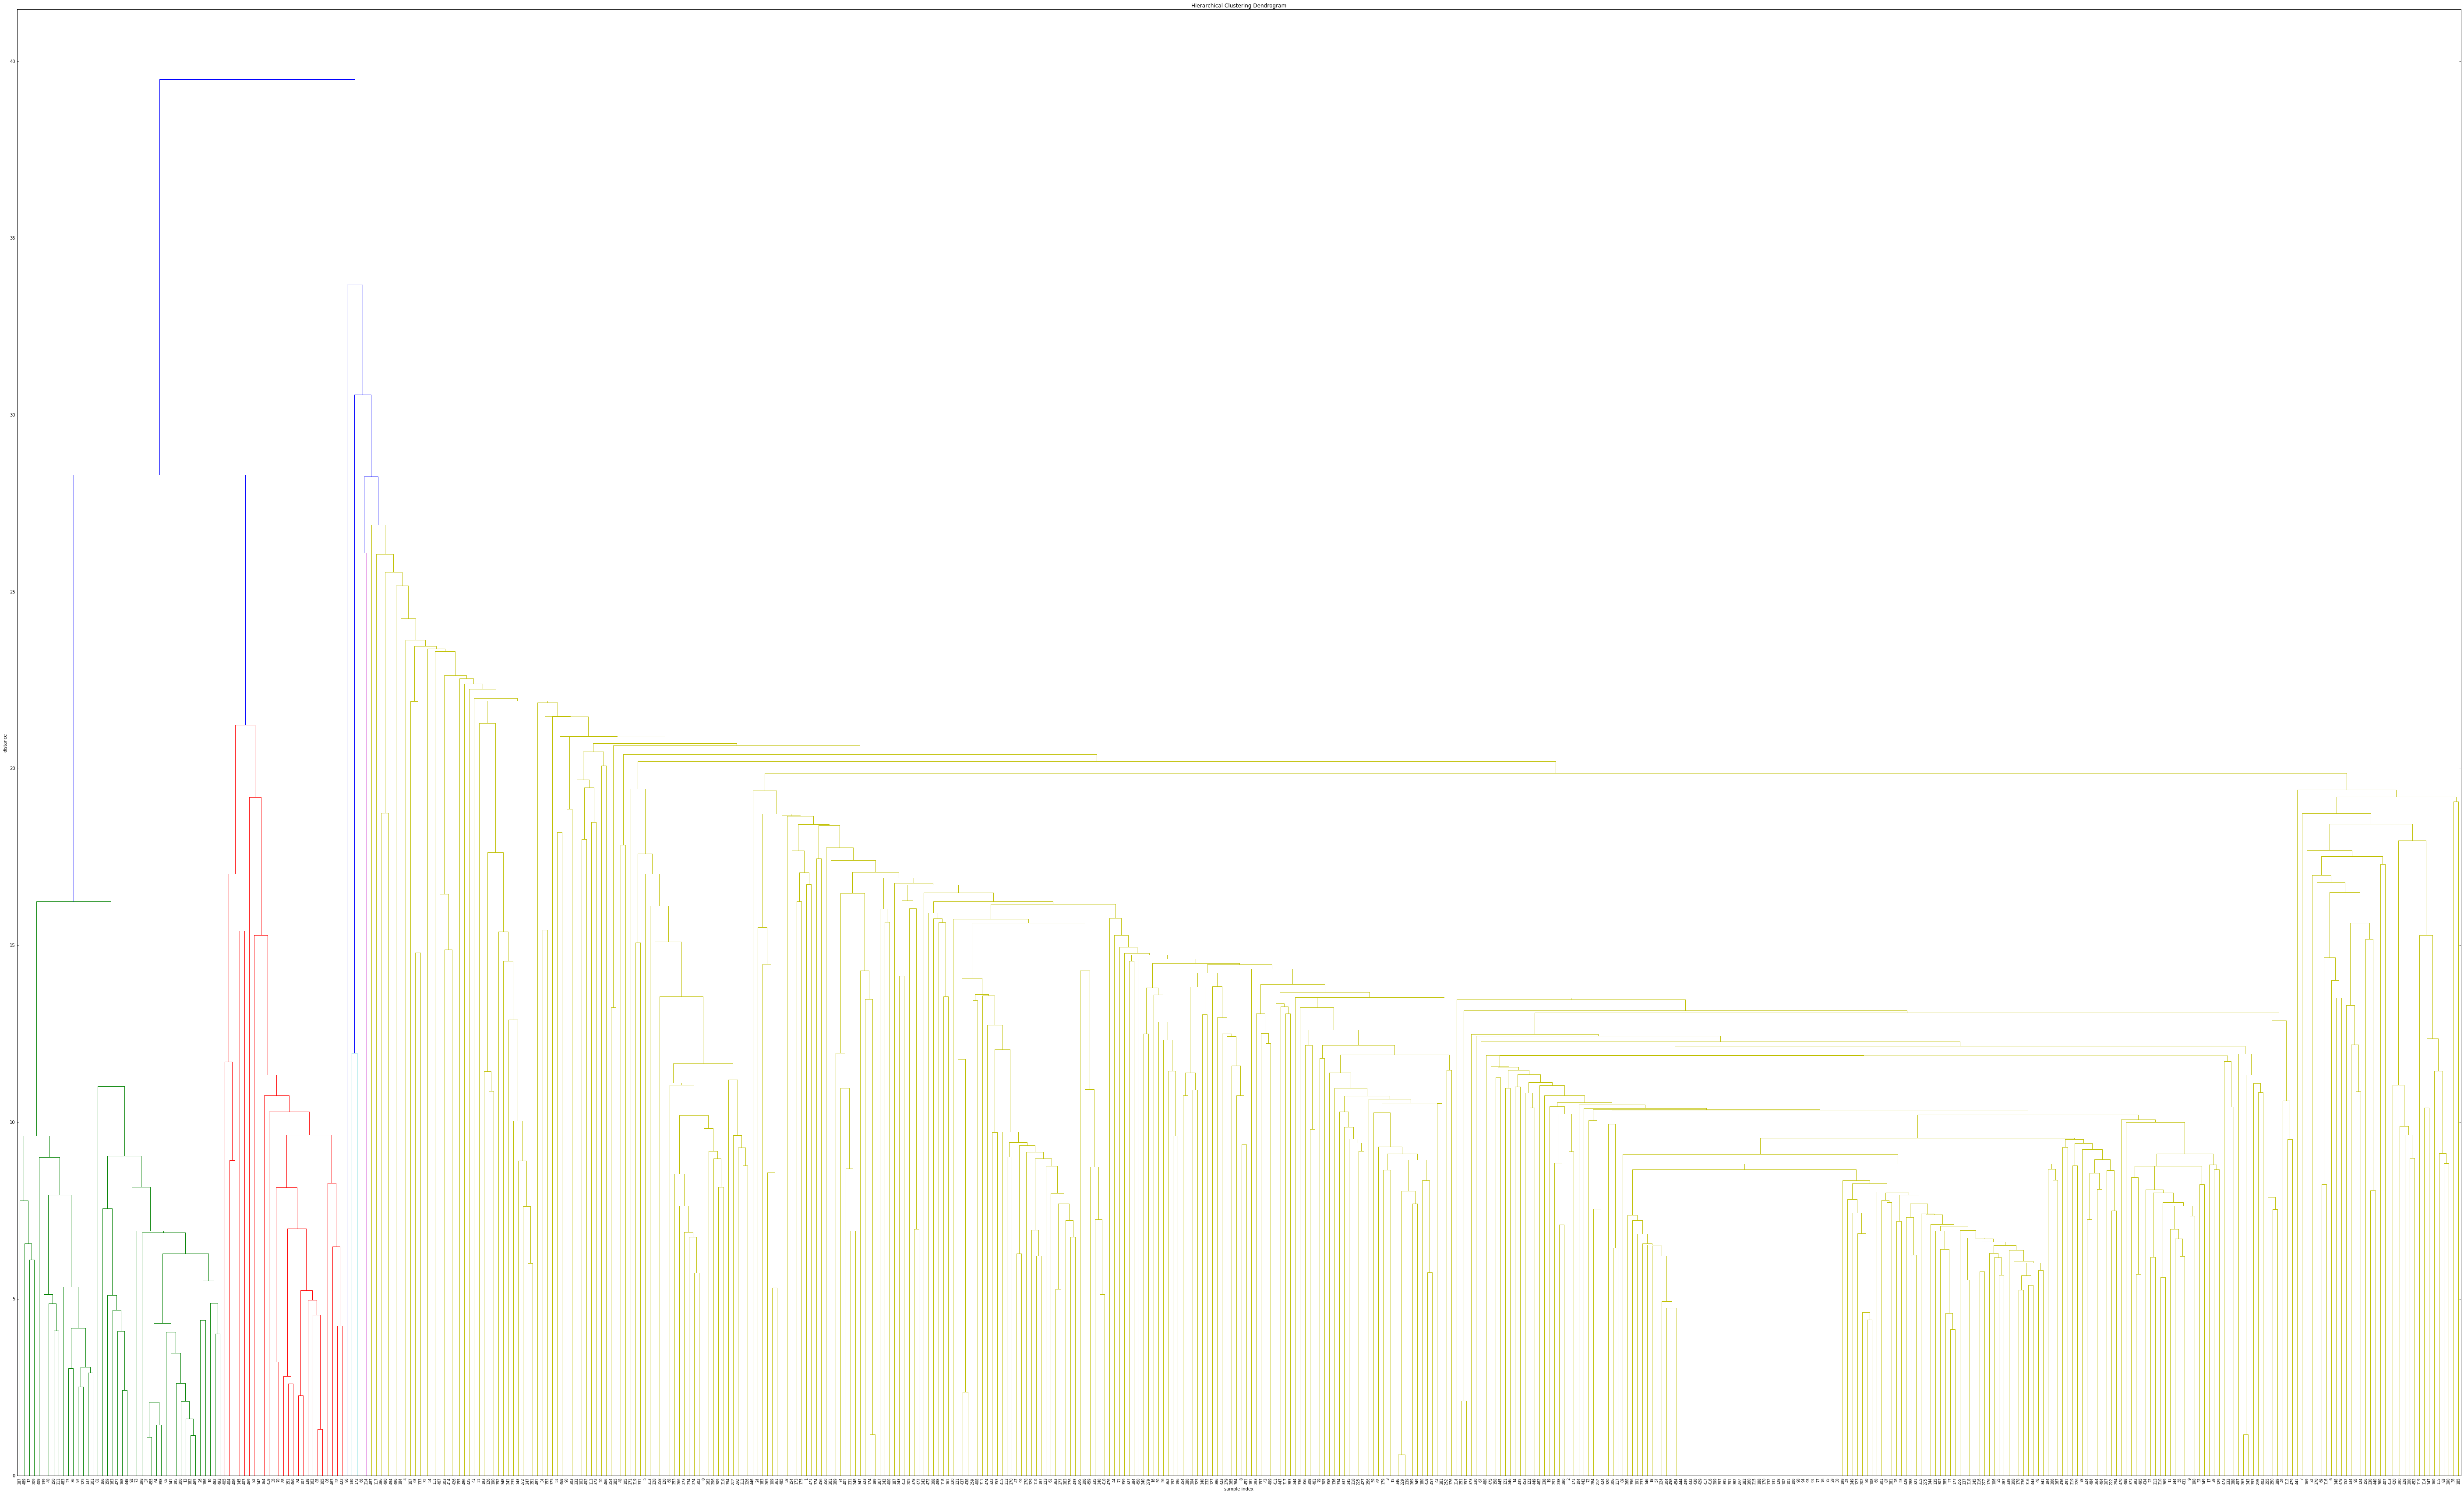

In [20]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(TFIDX, 'ward')

plt.figure(figsize=(100, 60))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

The hierarchical clustering dendrogram is very useful in measuring the similarity between the 500 news articles analyzed. A full sized graph can be found [here](https://raw.githubusercontent.com/HaojunZhu/datamining_uwyo/master/download.png). Documents that are clustered together are more similiar to each other. 